In [10]:
%pip install seaborn
%pip install pandas

import numpy as np
import helper
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd  

/Users/ramazanbulut/.zshenv:1: permission denied: /Library/Java/JavaVirtualMachines/adoptopenjdk-8.jdk/Contents/Home
Note: you may need to restart the kernel to use updated packages.
/Users/ramazanbulut/.zshenv:1: permission denied: /Library/Java/JavaVirtualMachines/adoptopenjdk-8.jdk/Contents/Home
Note: you may need to restart the kernel to use updated packages.


In [15]:
x = np.zeros((10000,4096))
nmf = NMF(n_components=10, init = 'random', tol=5e-3)
for i in range(10000):
    image = Image.open("../input/3dshapes_train/{}.jpg".format(i)).convert('L')
    x[i] = np.array(image).flatten()
print("before reduction shape:",x.shape)
x_nmf=nmf.fit_transform(x)
print("after reduction shape:",x_nmf.shape)

tsne=TSNE(n_components=2)
x_tsne=tsne.fit_transform(x_nmf)
print("after tsne reduction shape:",x_nmf.shape)









before reduction shape: (10000, 4096)
after reduction shape: (10000, 10)
after tsne reduction shape: (10000, 10)


<AxesSubplot:xlabel='feature1', ylabel='feature2'>

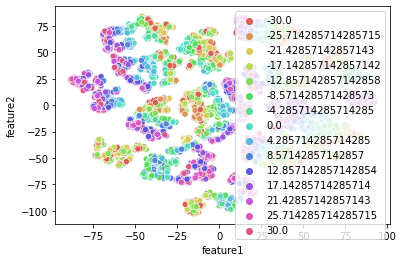

In [34]:
df = pd.DataFrame()
df["y"] = np.load('../input/orientations_train.npy')
df["feature1"] = x_tsne[:,0]
df["feature2"] = x_tsne[:,1]

sns.scatterplot(x="feature1", y="feature2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 15),legend="auto",
                data=df)